In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the diabetes_data.csv.
import pandas as pd
diabetes_data_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Stephen/diabetes_data.csv')
# Display the first few rows
diabetes_data_df.head()



,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [2]:
# List of all the columns in the data set
print(diabetes_data_df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')


## Drop Non-Beneficial Columns

In [3]:
# Drop the non-beneficial ID columns, 'PatientID' and 'DoctorInCharge'.
diabetes_data_clean_df = diabetes_data_df.drop(columns=['PatientID', 'DoctorInCharge'])

In [4]:
diabetes_data_clean_df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,1,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,51,1,0,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,89,1,0,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,21,1,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,27,1,0,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,37,0,0,2,2,20.811137,0,10.946207,3.217636,8.338196,...,0,1,88.122729,0,0,1,3.154225,3.849584,8.805087,0
1875,80,1,0,2,2,27.694312,0,16.067905,7.107335,3.034771,...,1,0,77.128599,0,0,1,0.424893,5.217465,0.915878,1
1876,38,1,0,0,2,35.640824,0,4.865124,9.881212,2.657002,...,0,0,13.148221,0,0,0,0.553757,3.377744,3.017481,1
1877,43,0,1,2,0,32.423016,0,6.362936,4.750079,8.736024,...,0,0,54.370980,0,0,0,1.132470,0.009250,4.914556,1


In [5]:
print(diabetes_data_clean_df.nunique())

Age                                71
Gender                              2
Ethnicity                           4
SocioeconomicStatus                 3
EducationLevel                      4
BMI                              1879
Smoking                             2
AlcoholConsumption               1879
PhysicalActivity                 1879
DietQuality                      1879
SleepQuality                     1879
FamilyHistoryDiabetes               2
GestationalDiabetes                 2
PolycysticOvarySyndrome             2
PreviousPreDiabetes                 2
Hypertension                        2
SystolicBP                         90
DiastolicBP                        60
FastingBloodSugar                1879
HbA1c                            1879
SerumCreatinine                  1879
BUNLevels                        1879
CholesterolTotal                 1879
CholesterolLDL                   1879
CholesterolHDL                   1879
CholesterolTriglycerides         1879
Antihyperten

## Binning w/ Logarithmic Transformation

**Columns:** 'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                        'SleepQuality', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
                        'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
                        'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels',
                        'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence',
                        'HealthLiteracy'
                      


In [6]:
def log_transform_and_bin(diabetes_data_clean_df, columns, num_bins=10, drop_original=True):
    """
    Logarithmically transform specified columns, bin them, and optionally drop the original columns.

    Parameters:
        diabetes_data_clean_df (pd.DataFrame): The DataFrame to be transformed.
        columns (list): List of columns to log-transform and bin.
        num_bins (int): The number of bins to create. Default is 10.
        drop_original (bool): If True, drop the original columns. Default is True.

    Returns:
        pd.DataFrame: The transformed DataFrame with binned columns.
    """

    transformed_df = diabetes_data_clean_df.copy()

    for col in columns:
        # Log-transform the specified column
        transformed_df[f'Log_{col}'] = np.log1p(transformed_df[col])

        # Create bins based on the log-transformed values
        log_bins = pd.cut(transformed_df[f'Log_{col}'], bins=num_bins)

        # Access the bin edges from the categorical object
        bin_edges_log_scale = log_bins.cat.categories

        # Reverse the logarithmic transformation to get the bin edges on the original scale
        bin_edges = np.expm1([bin_edges_log_scale.left.min()] + list(bin_edges_log_scale.right))

        # Ensure bin edges are unique
        bin_edges = np.unique(bin_edges)

        # Create bin labels corresponding to the reversed log-transformed bin edges
        bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1]-1)}' for i in range(len(bin_edges)-1)]

        # Assign the custom labels and create the binned column in the original DataFrame
        transformed_df[f'{col}_Bins'] = pd.cut(transformed_df[col], bins=bin_edges, labels=bin_labels, right=False, ordered=False)

        # Optionally drop the original and temporary Log column
        if drop_original:
            transformed_df.drop(columns=[col, f'Log_{col}'], inplace=True)
        else:
            transformed_df.drop(columns=[f'Log_{col}'], inplace=True)

    return transformed_df

# Example usage
# Assuming 'diabetes_data_clean_df' is already defined and has the specified columns
columns_to_transform = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                        'SleepQuality', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
                        'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
                        'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels',
                        'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence',
                        'HealthLiteracy']

transformed_df = log_transform_and_bin(diabetes_data_clean_df, columns_to_transform)

# Display the first few rows of the transformed DataFrame
print(transformed_df.head())



   Gender  Ethnicity  SocioeconomicStatus  EducationLevel  Smoking  \
0       0          1                    2               1        1   
1       1          0                    1               2        0   
2       1          0                    1               3        0   
3       1          1                    1               2        1   
4       1          0                    1               3        0   

   FamilyHistoryDiabetes  GestationalDiabetes  PolycysticOvarySyndrome  \
0                      1                    1                        0   
1                      0                    0                        0   
2                      1                    0                        0   
3                      1                    1                        0   
4                      0                    0                        0   

   PreviousPreDiabetes  Hypertension  ...  BUNLevels_Bins  \
0                    0             0  ...           25-31   
1           

In [7]:
transformed_df.head(5)

,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,Smoking,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,PreviousPreDiabetes,Hypertension,...,BUNLevels_Bins,CholesterolTotal_Bins,CholesterolLDL_Bins,CholesterolHDL_Bins,CholesterolTriglycerides_Bins,FatigueLevels_Bins,QualityOfLifeScore_Bins,MedicalCheckupsFrequency_Bins,MedicationAdherence_Bins,HealthLiteracy_Bins
0,0,1,2,1,1,1,1,0,0,0,...,25-31,243-260,76-86,62-71,174-214,7-9,62-98,1-1,4-4,5-6
1,1,0,1,2,0,0,0,0,0,0,...,25-31,149-159,100-114,38-44,76-92,0-0,62-98,3-2,5-6,4-4
2,1,0,1,3,0,1,0,0,0,0,...,8-9,227-242,57-65,62-71,264-324,7-9,39-61,2-2,7-9,5-6
3,1,1,1,2,1,1,1,0,1,0,...,40-48,172-183,66-75,45-51,93-114,3-3,62-98,1-0,2-2,4-4
4,1,0,1,3,0,0,0,0,0,0,...,6-7,149-159,66-75,38-44,325-399,2-2,24-38,0-0,5-6,7-8


In [8]:
print(transformed_df.nunique())

Gender                            2
Ethnicity                         4
SocioeconomicStatus               3
EducationLevel                    4
Smoking                           2
FamilyHistoryDiabetes             2
GestationalDiabetes               2
PolycysticOvarySyndrome           2
PreviousPreDiabetes               2
Hypertension                      2
AntihypertensiveMedications       2
Statins                           2
AntidiabeticMedications           2
FrequentUrination                 2
ExcessiveThirst                   2
UnexplainedWeightLoss             2
BlurredVision                     2
SlowHealingSores                  2
TinglingHandsFeet                 2
HeavyMetalsExposure               2
OccupationalExposureChemicals     2
WaterQuality                      2
Diagnosis                         2
Age_Bins                         10
BMI_Bins                         10
AlcoholConsumption_Bins           8
PhysicalActivity_Bins             8
DietQuality_Bins            

## Dummies

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
transformed_dummies_df = pd.get_dummies(transformed_df, columns=['Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'Age_Bins', 'BMI_Bins', 'AlcoholConsumption_Bins',
       'PhysicalActivity_Bins', 'DietQuality_Bins', 'SleepQuality_Bins',
       'SystolicBP_Bins', 'DiastolicBP_Bins', 'FastingBloodSugar_Bins',
       'HbA1c_Bins', 'SerumCreatinine_Bins', 'BUNLevels_Bins',
       'CholesterolTotal_Bins', 'CholesterolLDL_Bins', 'CholesterolHDL_Bins',
       'CholesterolTriglycerides_Bins', 'FatigueLevels_Bins',
       'QualityOfLifeScore_Bins', 'MedicalCheckupsFrequency_Bins',
       'MedicationAdherence_Bins', 'HealthLiteracy_Bins'])

# Convert all columns to integers
transformed_dummies_df = transformed_dummies_df.astype(int)

# Display the first few rows of the transformed DataFrame
transformed_dummies_df.head()


,Gender,Smoking,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,PreviousPreDiabetes,Hypertension,AntihypertensiveMedications,Statins,AntidiabeticMedications,...,MedicationAdherence_Bins_5-6,MedicationAdherence_Bins_7-9,HealthLiteracy_Bins_0-0,HealthLiteracy_Bins_1-0,HealthLiteracy_Bins_1-1,HealthLiteracy_Bins_2-2,HealthLiteracy_Bins_3-3,HealthLiteracy_Bins_4-4,HealthLiteracy_Bins_5-6,HealthLiteracy_Bins_7-8
0,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


## Identify Target (y) and Features (X)

In [10]:
# Split our preprocessed data into our features and target arrays
y = transformed_dummies_df["Diagnosis"]
X = transformed_dummies_df.drop(columns="Diagnosis")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    stratify=y)
X_train.shape

(1409, 219)

In [11]:
print(X_train.dtypes)

Gender                     int64
Smoking                    int64
FamilyHistoryDiabetes      int64
GestationalDiabetes        int64
PolycysticOvarySyndrome    int64
                           ...  
HealthLiteracy_Bins_2-2    int64
HealthLiteracy_Bins_3-3    int64
HealthLiteracy_Bins_4-4    int64
HealthLiteracy_Bins_5-6    int64
HealthLiteracy_Bins_7-8    int64
Length: 219, dtype: object


## StandardScaler

## Neural Network #1

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
history = nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3904 - loss: 0.7809 - val_accuracy: 0.4681 - val_loss: 0.7071
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5393 - loss: 0.6953 - val_accuracy: 0.6312 - val_loss: 0.6686
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6065 - loss: 0.6707 - val_accuracy: 0.6099 - val_loss: 0.6585
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6065 - loss: 0.6553 - val_accuracy: 0.6064 - val_loss: 0.6523
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6203 - loss: 0.6481 - val_accuracy: 0.6312 - val_loss: 0.6454
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6812 - loss: 0.6312 - val_accuracy: 0.6525 - val_loss: 0.6367
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7160 - loss: 0.6233 - val_accuracy: 0.6596 - val_loss: 0.6265
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7403 - loss: 0.6050 - val_accuracy: 0.6915 - 

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


15/15 - 0s - 2ms/step - accuracy: 0.8319 - loss: 0.5029
Loss: 0.502924382686615, Accuracy: 0.8319149017333984


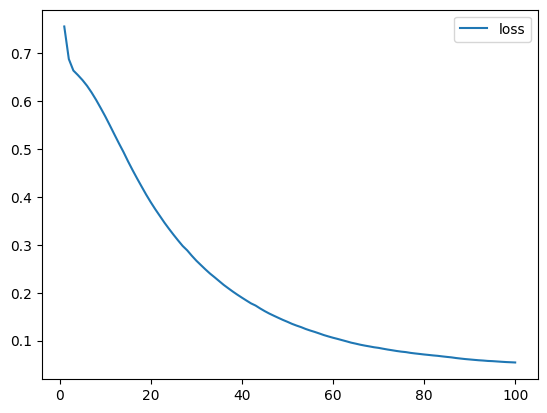

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(history.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

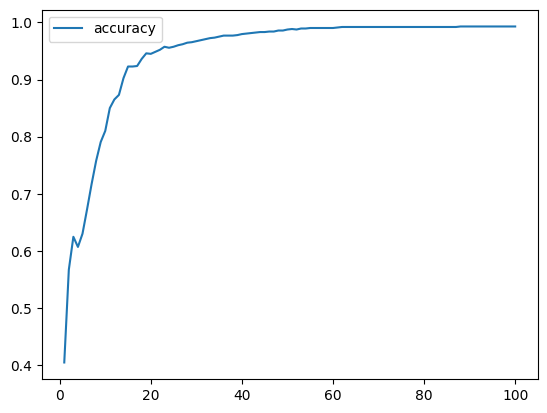

In [17]:
history_df.plot(y="accuracy")
plt.show()

# Weakest and Strongest Features

In [18]:
!pip install scikeras scikit-learn

In [19]:
!pip install --upgrade scipy scikit-learn scikeras

In [23]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Define a function to build your model (for KerasClassifier)
def create_model():
    return nn

# Wrap your Keras model with KerasClassifier
wrapped_nn = KerasClassifier(model=create_model, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model using the unscaled data
wrapped_nn.fit(X_train, y_train)

# Compute permutation importance using the unscaled test data
result = permutation_importance(wrapped_nn, X_test, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test is a DataFrame or convert it
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")




Weakest feature: HealthLiteracy_Bins_5-6 with importance -0.009787234042553172
Weakest feature: BUNLevels_Bins_16-19 with importance -0.007234042553191466
Weakest feature: AlcoholConsumption_Bins_14-18 with importance -0.00680851063829786
Weakest feature: HeavyMetalsExposure with importance -0.006382978723404242
Weakest feature: SystolicBP_Bins_110-117 with importance -0.006170212765957417
Weakest feature: CholesterolTriglycerides_Bins_264-324 with importance -0.005957446808510625
Weakest feature: EducationLevel_2 with importance -0.005531914893617007
Weakest feature: CholesterolLDL_Bins_50-56 with importance -0.005319148936170193
Weakest feature: Gender with importance -0.004893617021276575
Weakest feature: CholesterolTriglycerides_Bins_174-214 with importance -0.004680851063829761
Weakest feature: BUNLevels_Bins_20-24 with importance -0.004468085106382957
Weakest feature: CholesterolHDL_Bins_85-98 with importance -0.004255319148936165
Weakest feature: PhysicalActivity_Bins_7-8 with i

In [24]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Define a function to build your model (for KerasClassifier)
def create_model():
    return nn

# Wrap your Keras model with KerasClassifier
wrapped_nn = KerasClassifier(model=create_model, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model using the unscaled data
wrapped_nn.fit(X_train, y_train)

# Compute permutation importance using the unscaled test data
result = permutation_importance(wrapped_nn, X_test, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test is a DataFrame or convert it
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")


Strongest feature: FastingBloodSugar_Bins_162-179 with importance 0.03531914893617015
Strongest feature: HbA1c_Bins_4-3 with importance 0.030851063829787185
Strongest feature: HbA1c_Bins_5-5 with importance 0.03042553191489359
Strongest feature: FastingBloodSugar_Bins_96-105 with importance 0.02957446808510634
Strongest feature: HbA1c_Bins_8-8 with importance 0.02680851063829782
Strongest feature: HbA1c_Bins_3-3 with importance 0.025957446808510587
Strongest feature: FastingBloodSugar_Bins_146-161 with importance 0.025531914893616968
Strongest feature: FastingBloodSugar_Bins_131-145 with importance 0.022978723404255275
Strongest feature: FastingBloodSugar_Bins_77-85 with importance 0.021914893617021224
Strongest feature: HbA1c_Bins_9-8 with importance 0.021489361702127608
Strongest feature: HbA1c_Bins_7-7 with importance 0.01936170212765953
Strongest feature: FastingBloodSugar_Bins_86-95 with importance 0.01936170212765952
Strongest feature: FastingBloodSugar_Bins_70-76 with importance